In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [3]:
df = pd.read_csv(r"file_location\loan-1.csv")

In [4]:
#display dimension of data frame
print(df.shape)
print("#"*50)
df.info()

(614, 13)
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
print(df.sample(n=10))
print("#"*50)
print(df.columns)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
520  LP002689    Male     Yes          2  Not Graduate            No   
288  LP001931  Female      No          0      Graduate            No   
33   LP001098    Male     Yes          0      Graduate            No   
261  LP001868    Male      No          0      Graduate            No   
392  LP002263    Male     Yes          0      Graduate            No   
511  LP002640    Male     Yes          1      Graduate            No   
172  LP001586    Male     Yes         3+  Not Graduate            No   
242  LP001806    Male      No          0      Graduate            No   
552  LP002785    Male     Yes          1      Graduate            No   
490  LP002560    Male      No          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
520             2192             1742.0        45.0             360.0   
288             4124                0.0       115.0          

In [6]:
df.drop(df.columns[[0]],axis=1,inplace=True)

In [7]:
df.info()
#display statistcs from numerical column
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
duplicate_rows = df[df.duplicated()]
duplicate_rows
df.duplicated().sum()

0

In [9]:
print("SUM: \n",df.isnull().sum())

SUM: 
 Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


<Axes: >

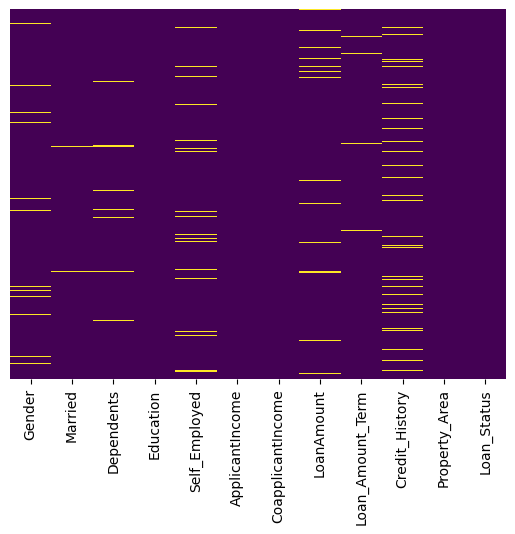

In [10]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [11]:
#non-numeric columns
df["Gender"]    =df["Gender"].fillna(df['Gender'].mode()[0])
df["Married"]    =df["Married"].fillna(df['Married'].mode()[0])
df["Dependents"]    =df["Dependents"].fillna(df['Dependents'].mode()[0])
df["Self_Employed"]    =df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

#numeric columns
df["LoanAmount"]    =df["LoanAmount"].fillna(df['LoanAmount'].mean())

df["Loan_Amount_Term"]    =df["Loan_Amount_Term"].fillna(df['Loan_Amount_Term'].interpolate())
df["Credit_History"]    =df["Credit_History"].fillna(df['Credit_History'].interpolate())

print("SUM \n",df.isnull().sum())

SUM 
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


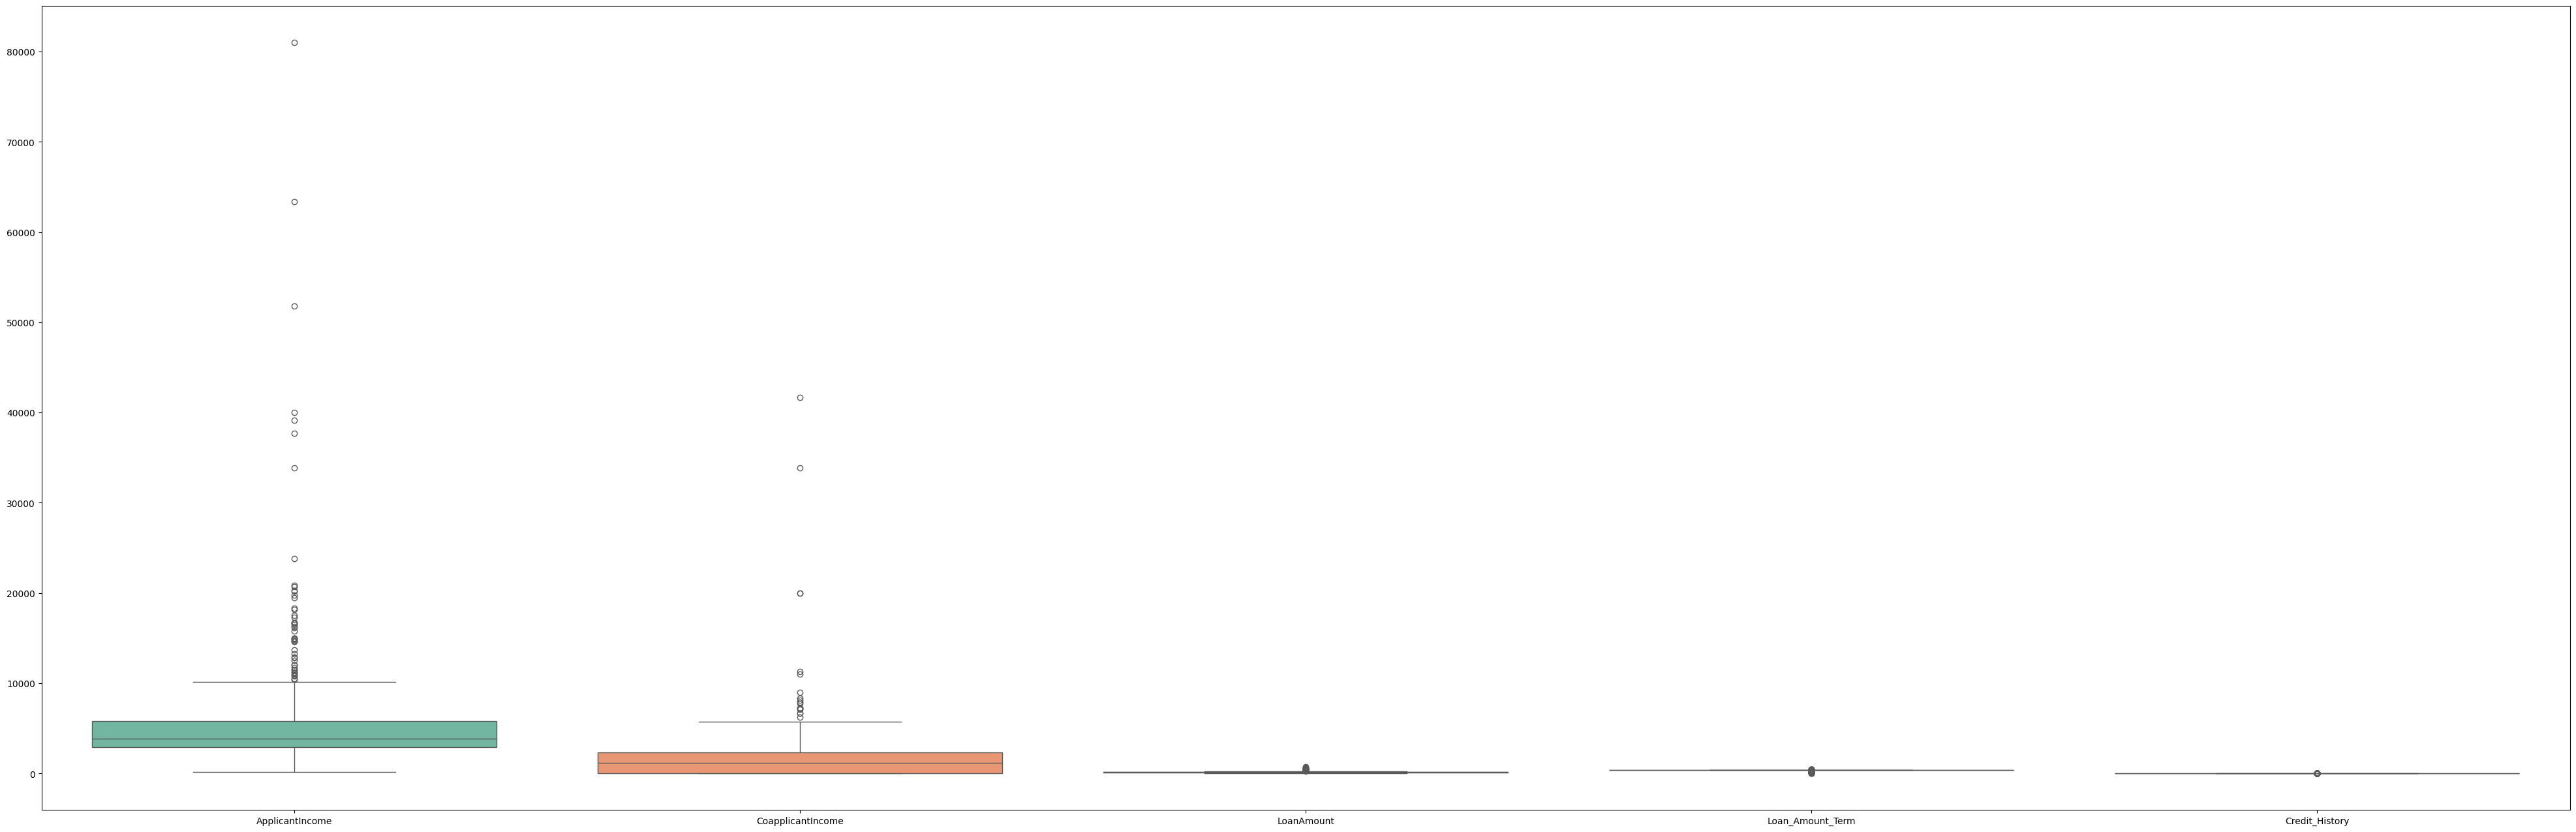

In [12]:
#Handling Outlier
fig, ax = plt.subplots(figsize=(50,16))
sns.boxplot(data=df,orient="v",palette="Set2")
plt.show()

c:\Users\atlas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 46.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='ApplicantIncome'>

c:\Users\atlas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


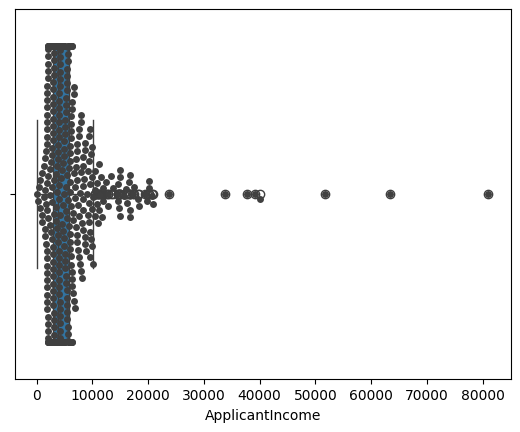

In [13]:
sns.boxplot(x=df['ApplicantIncome'],data=df)
sns.swarmplot(x=df['ApplicantIncome'],data=df,color=".25")

0
Q1= 2877.5 Q3= 5795.0 IQR= 2917.5
----------------
1
Q1= 0.0 Q3= 2297.25 IQR= 2297.25
----------------


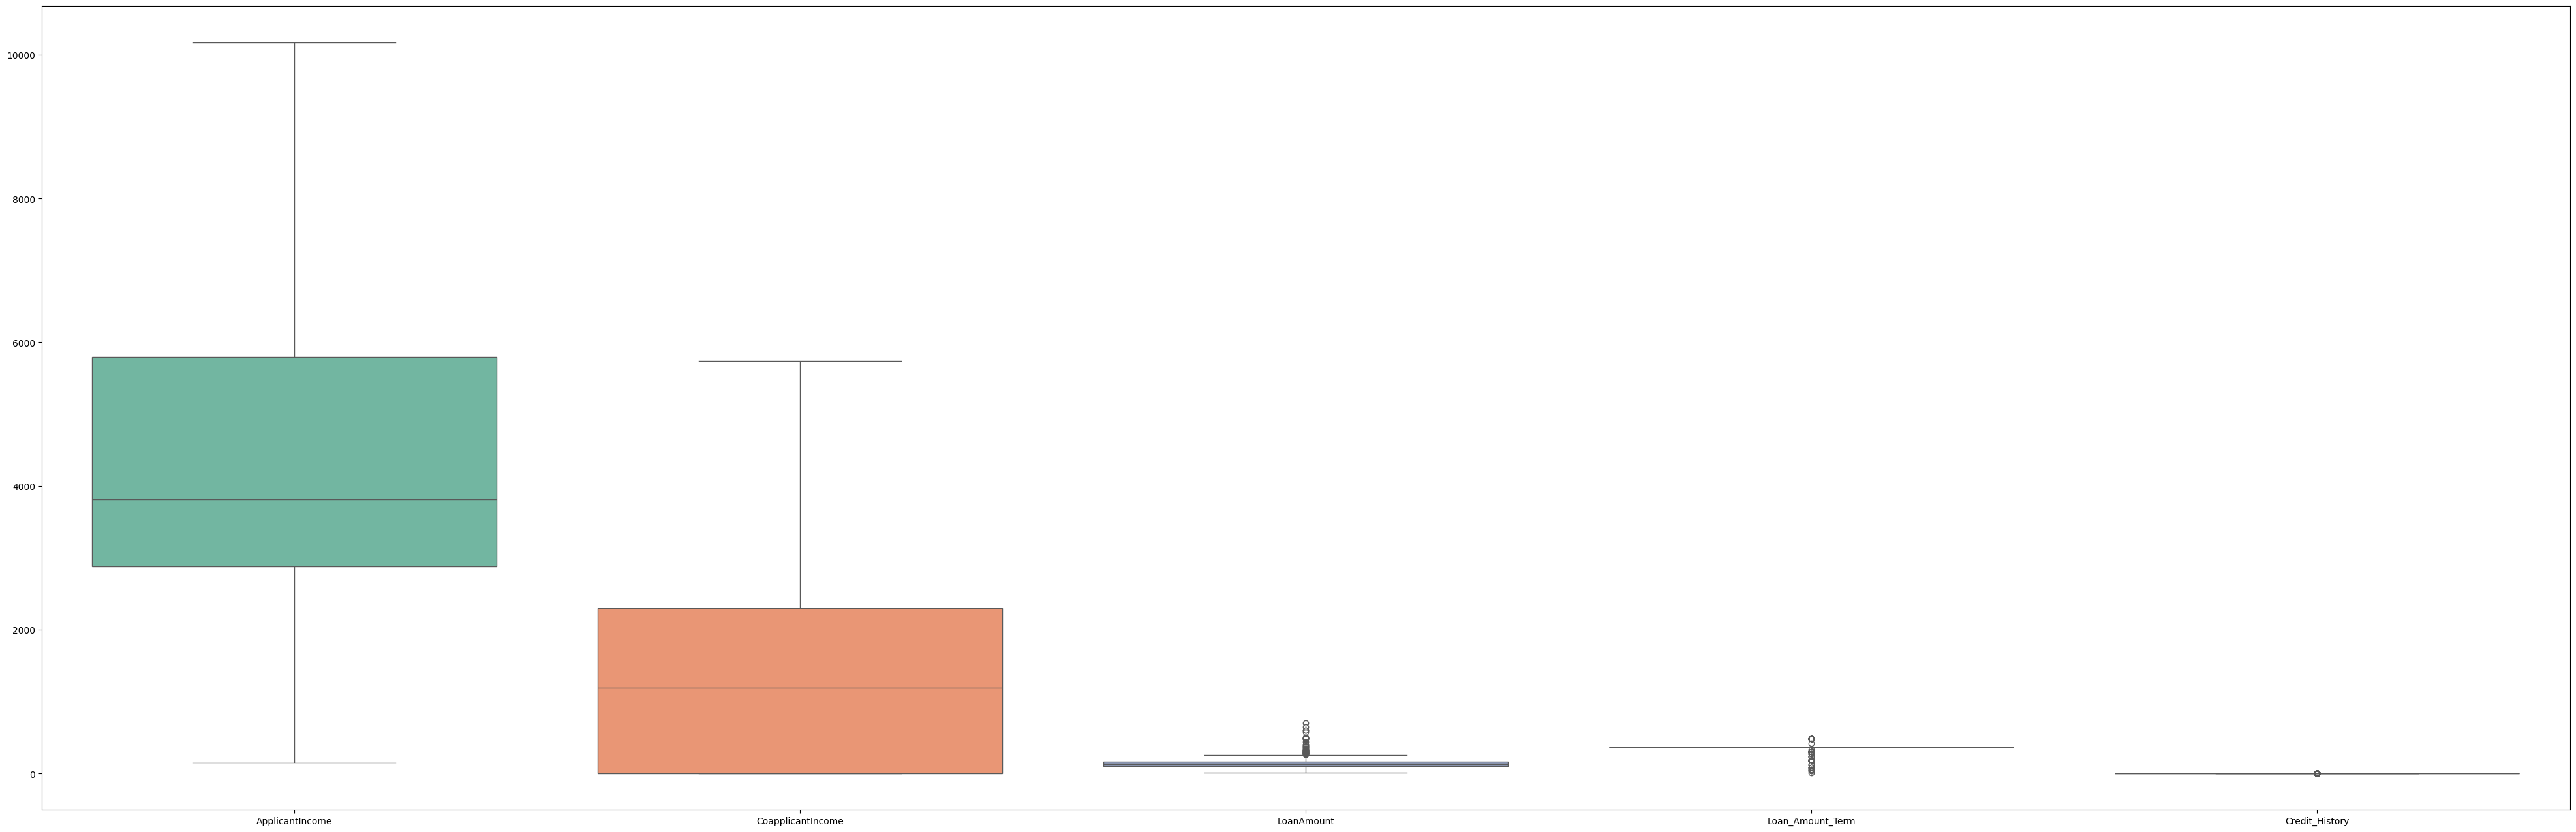

In [14]:
#remove outlier
def remove_outlier(col):
    sorted(col)
    Q1, Q3= col.quantile([0.25,0.75])
    IQR = Q3-Q1
    print("Q1=",Q1,"Q3=",Q3,"IQR=",IQR)
    lower_range=Q1 - (1.5*IQR)
    upper_range=Q3 + (1.5*IQR)
    return lower_range,upper_range
lst_cols = ['ApplicantIncome','CoapplicantIncome']

index=0
for col in lst_cols:
    print(index)
    lower_range,upper_range = remove_outlier(df[col])
    df[col]=np.where(df[col]<lower_range,lower_range,df[col])
    df[col]=np.where(df[col]>upper_range,upper_range,df[col])
    index = index + 1
    print("----------------")

fig, ax = plt.subplots(figsize=(50,16))
sns.boxplot(data=df,orient="v",palette="Set2")
plt.show()

In [15]:
#value counts() function : return a series containing counts of unique values
print(df['Gender'].value_counts())
print("#"*50)
print(df['Married'].value_counts())
print("#"*50)
print(df['Dependents'].value_counts())
print("#"*50)
print(df['Education'].value_counts())
print("#"*50)
print(df['Self_Employed'].value_counts())
print("#"*50)
print(df['Property_Area'].value_counts())
print("#"*50)
print(df['Loan_Status'].value_counts())

Gender
Male      502
Female    112
Name: count, dtype: int64
##################################################
Married
Yes    401
No     213
Name: count, dtype: int64
##################################################
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
##################################################
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
##################################################
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
##################################################
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
##################################################
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [16]:
#Mapping of data feature values
df['Gender']        =df['Gender'].map({"Male":0,"Female":1})
df['Married']        =df['Married'].map({"No":0,"Yes":1})
df['Dependents']        =df['Dependents'].map({"0":0,"1":1,"2":2,"3+":3})
df['Education']        =df['Education'].map({"Not Graduate":0,"Graduate":1})
df['Self_Employed']        =df['Self_Employed'].map({"No":0,"Yes":1})
df['Property_Area']        =df['Property_Area'].map({"Semiurban":0,"Urban":1,"Rural":2})
df['Loan_Status']        =df['Loan_Status'].map({"N":0,"Y":1})

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB
None


<Axes: title={'center': 'Loan_Status'}, xlabel='Loan_Status'>

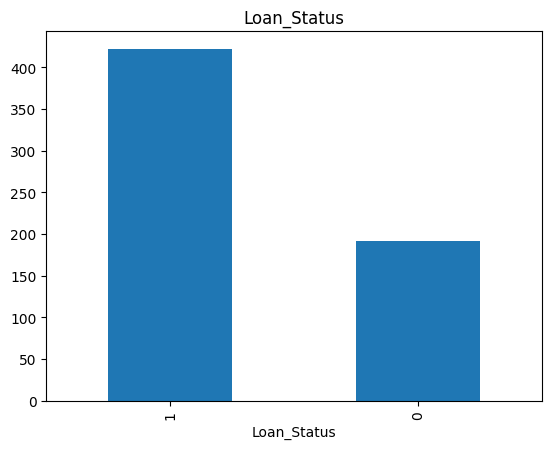

In [17]:
#visualize the total number of labels of each type in data
df['Loan_Status'].value_counts().plot.bar(title="Loan_Status")

<Axes: >

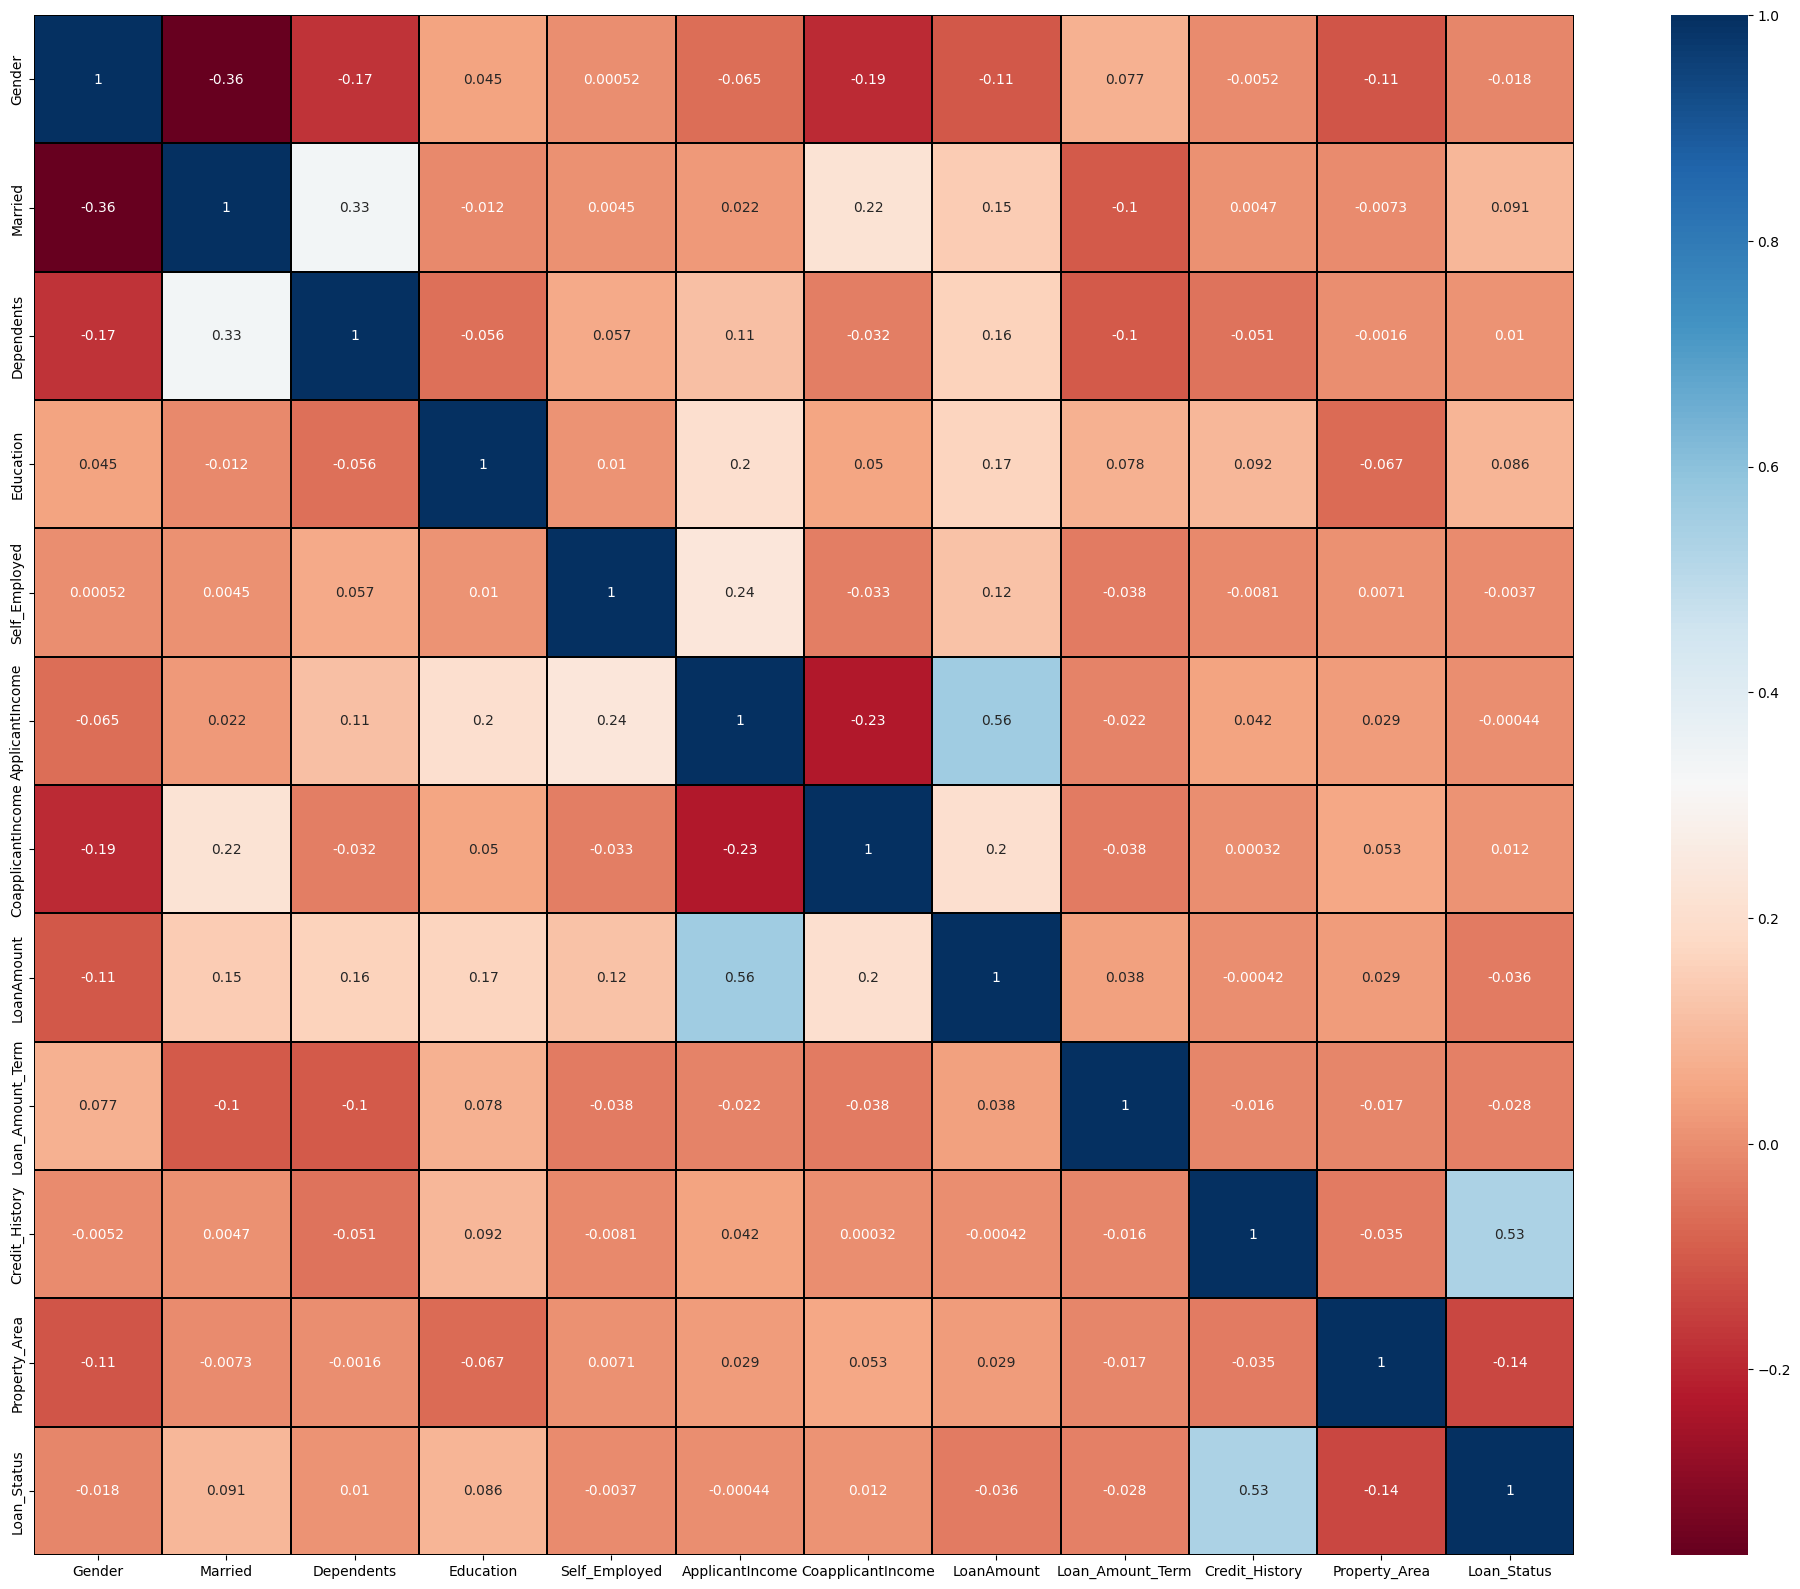

In [19]:
#Selecting Relevant Features
corrMatrix = df.corr()

fig,ax = plt.subplots(figsize=(25,20))
#sns.heatmap(corrMatrix,annot=True)
sns.heatmap(corrMatrix,annot=True,linewidth=0.01,square=True,cmap="RdBu",linecolor="black")

In [20]:
#Correlation with output variable
cor_target = abs(corrMatrix['Loan_Status'])

#Selecting highly correlated features : 0.01
relevant_features = cor_target[cor_target>0.01]
print("relevant_feature:",relevant_features.shape,"\n",relevant_features)

print("#-------------------------------------------")
lst_columns = relevant_features.index.to_list()

my_data = pd.DataFrame(df,columns=lst_columns)
print(my_data.head(10))

print("#-------------------------------------------")
cor_target = abs(corrMatrix['Loan_Status'])
#Selecting highly correlated features : 0.01
relevant_features = cor_target[cor_target>0.01]
print("relevant_features : ",relevant_features.shape,"\n",relevant_features)

print("-----------------------------------------------")
lst_columns = relevant_features.index.to_list()

myd_data = pd.DataFrame(df,columns=lst_columns)
print(my_data.head(10))

print("---------------------------------")
my_cols = my_data.columns.to_list()
print("List the column names : ",len(my_cols),"\n",my_cols)

relevant_feature: (10,) 
 Gender               0.017987
Married              0.091478
Dependents           0.010118
Education            0.085884
CoapplicantIncome    0.011983
LoanAmount           0.036416
Loan_Amount_Term     0.028170
Credit_History       0.533825
Property_Area        0.137545
Loan_Status          1.000000
Name: Loan_Status, dtype: float64
#-------------------------------------------
   Gender  Married  Dependents  Education  CoapplicantIncome  LoanAmount  \
0       0        0           0          1              0.000  146.412162   
1       0        1           1          1           1508.000  128.000000   
2       0        1           0          1              0.000   66.000000   
3       0        1           0          0           2358.000  120.000000   
4       0        0           0          1              0.000  141.000000   
5       0        1           2          1           4196.000  267.000000   
6       0        1           0          0           1516.000   

In [21]:
#Define X variables and our target(y)
X = my_data.drop(["Loan_Status"],axis=1).values
y = my_data['Loan_Status'].values
print("X : ",X.shape,"y : ",y.shape)

print("---------------------------------------------")
#Blance the dataset
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN,BorderlineSMOTE,SMOTENC
X,y = ADASYN().fit_resample(X,y)
print("X = ",X.shape,"y = ",y.shape)
print("Labels : ",np.unique(y))
print("Nbr of 0 : ",np.count_nonzero(y==0))
print("Nbr of 1: ",np.count_nonzero(y==1))

X :  (614, 9) y :  (614,)
---------------------------------------------
X =  (827, 9) y =  (827,)
Labels :  [0 1]
Nbr of 0 :  405
Nbr of 1:  422


In [22]:
#Standardization
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()
st_scaler.fit(X)
X_st_scaler = st_scaler.transform(X)

#Split into Input and Output Elements
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_st_scaler,
                                                 y,test_size=0.20,random_state=100,stratify=y)
print("X_train=",X_train.shape,"y_train = ",y_train.shape)
print("X_test = ",X_test.shape,"y_test = ",y_test.shape)

X_train= (661, 9) y_train =  (661,)
X_test =  (166, 9) y_test =  (166,)


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.67      0.78        81
           1       0.75      0.96      0.85        85

    accuracy                           0.82       166
   macro avg       0.85      0.82      0.81       166
weighted avg       0.85      0.82      0.81       166

----------------------------------------------------------------------
Confusion Matrix : 
 [[54 27]
 [ 3 82]] 

Normalized confusion Matrix : 
 [[0.66666667 0.33333333]
 [0.03529412 0.96470588]] 

-------------------------------------------------


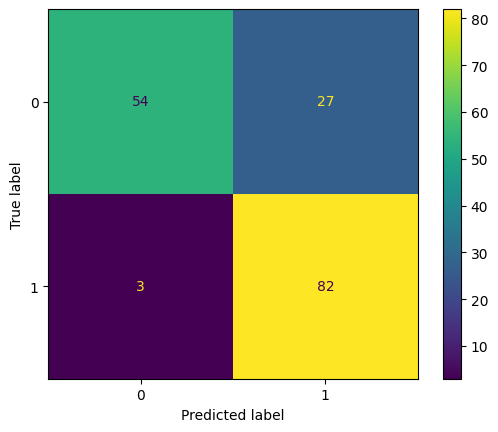

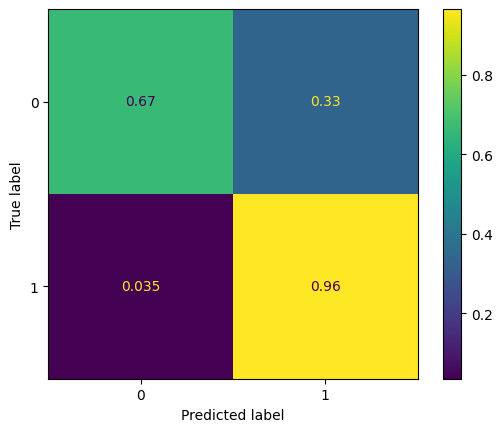

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

#Classifier
classifier = RandomForestClassifier(n_estimators=500,max_depth=5)

#Train the classifier
classifier.fit(X_train,y_train)

#Making prediction on the testing set
predicted = classifier.predict(X_test)

print("Classification report : \n",metrics.classification_report(y_test,predicted))
print("----------------------------------------------------------------------")

cm = confusion_matrix(y_test,predicted,labels=classifier.classes_)
cm_normalize = confusion_matrix(y_test,predicted,labels=classifier.classes_,normalize="true")

print("Confusion Matrix : \n",cm,"\n")
print("Normalized confusion Matrix : \n",cm_normalize,"\n")

print("-------------------------------------------------")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp_normalize = ConfusionMatrixDisplay(confusion_matrix=cm_normalize,
                                        display_labels=classifier.classes_)
disp.plot()
disp_normalize.plot()